In [1]:
using Plots
using LaTeXStrings

In [2]:
pyplot()

Plots.PyPlotBackend()

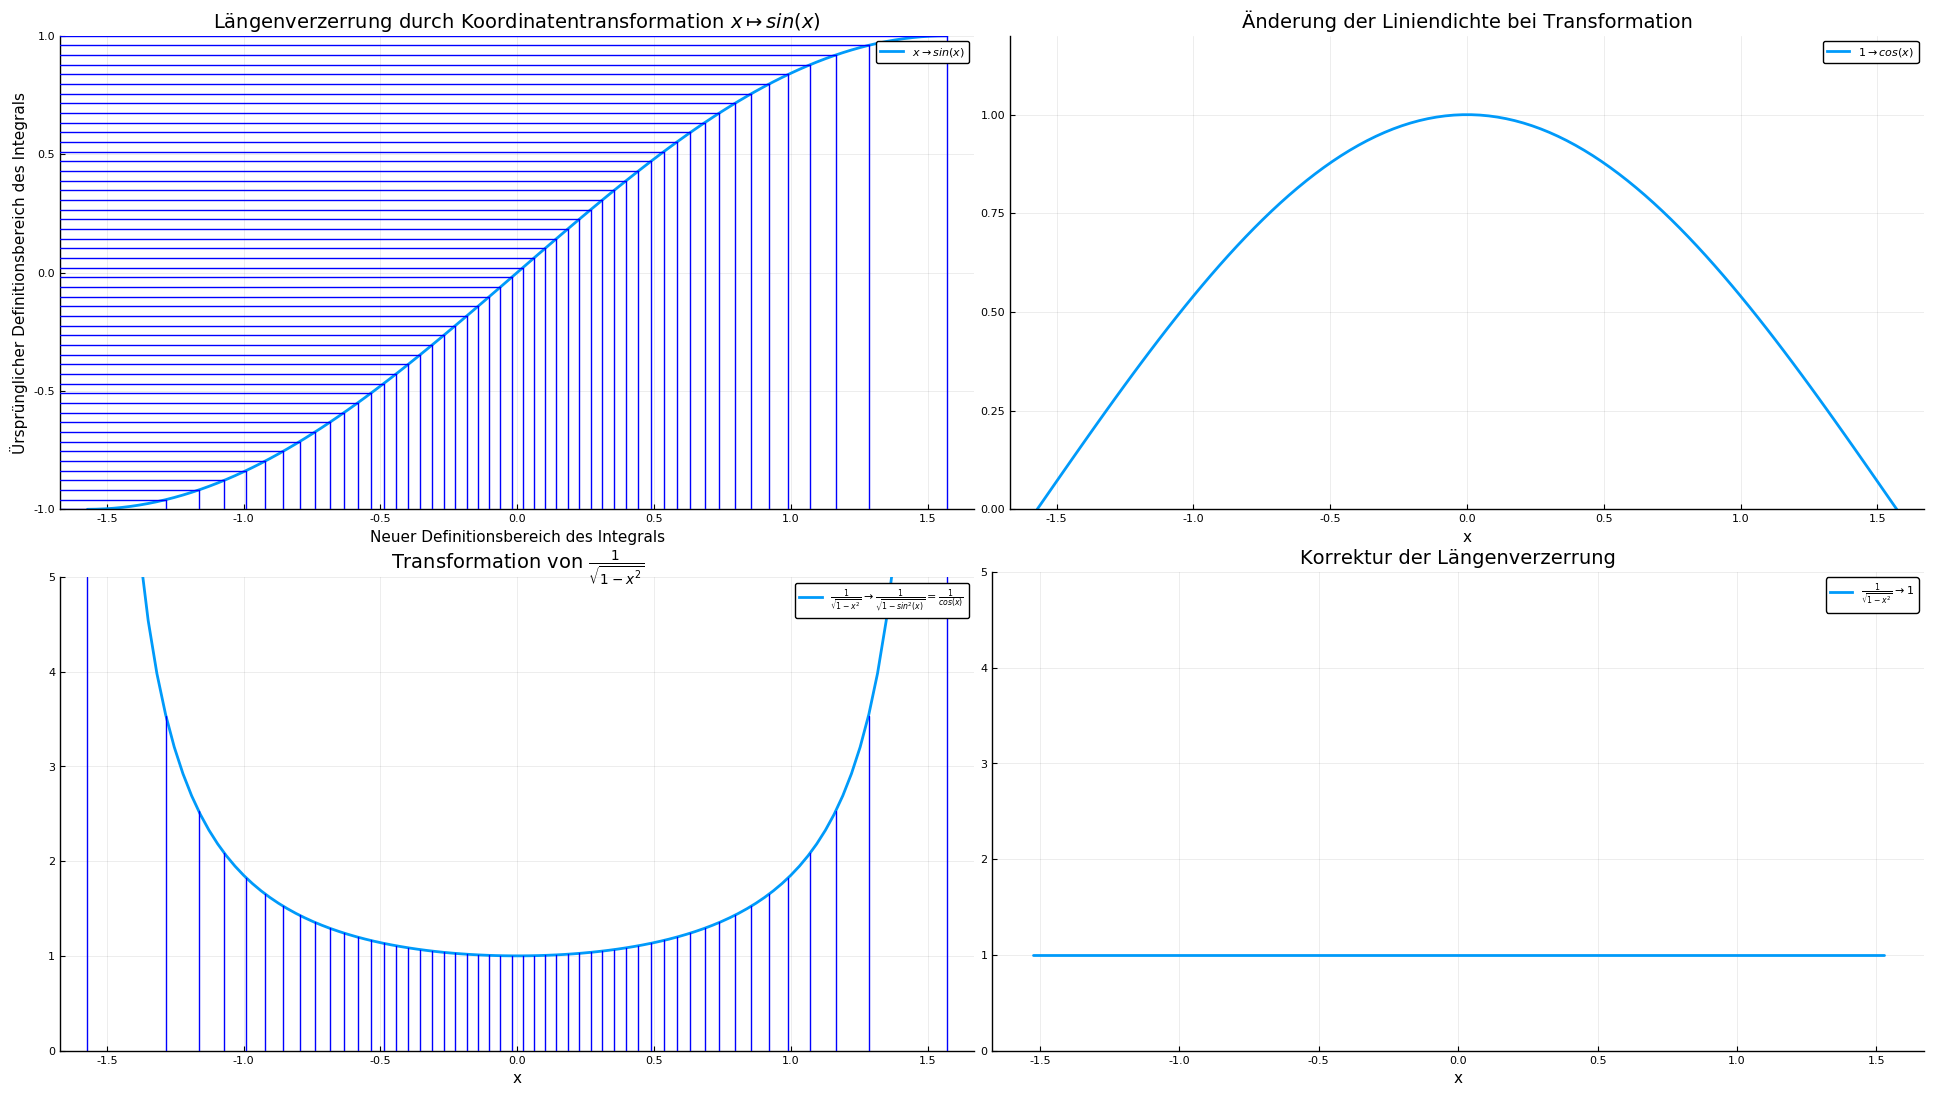

┌ Info: Saved animation to 
│   fn = /home/hmh/git/remeWi1819/julia/subst.mp4
└ @ Plots /home/hmh/.julia/packages/Plots/rmogG/src/animation.jl:90


Plots.AnimatedGif("/home/hmh/git/remeWi1819/julia/subst.mp4")

In [9]:
f(x) = 1/sqrt(1-x^2)
g(x, t) = clamp(t==0 ? x : sin(x*sqrt(t))/sqrt(t), -1, 1)
ginv(x, t) = t==0 ? x : asin(x*sqrt(t))/sqrt(t)

NBars = 50
Nx = 100

anim = @animate for t in LinRange(-0.2, 1.5, 170)
    t = clamp(t, 0, 1)
    
    p0 = plot(
        x->g(x,t),
        LinRange(ginv(-1,t), ginv(1,t), Nx),
        xlim=(ginv(-1,1)-0.1, ginv(1,1)+0.1),
        ylim=(-1,1),
        linewidth = 2,
        label=L"x \rightarrow sin(x)",
        xlabel="Neuer Definitionsbereich des Integrals",
        ylabel="Ürsprünglicher Definitionsbereich des Integrals",
        legend=:topright,
        title=L"Längenverzerrung durch Koordinatentransformation $x \mapsto sin(x)$"
    )
    for x in LinRange(-1, 1, NBars)
        xg = ginv(x,t)
        plot!(p0, [xg,xg], [-1,g(xg,t)], label="", color="blue")
        plot!(p0, [ginv(-1,1)-0.1,xg], [x,x], label="", color="blue")
    end
    
    p1 = plot(
        x->clamp(f(g(x,t)), 0, 10),
        LinRange(ginv(-1,t), ginv(1,t), Nx),
        xlim=(ginv(-1,1)-0.1, ginv(1,1)+0.1),
        ylim=(0,5),
        linewidth = 2,
        label=L"\frac{1}{\sqrt{1-x^2}} \rightarrow \frac{1}{\sqrt{1-sin^2(x)}} = \frac{1}{cos(x)}",
        xlabel="x",
        legend=:topright,
        title=L"Transformation von $\frac{1}{\sqrt{1-x^2}}$"
    )
    for x in LinRange(-1, 1, NBars)
        xg = ginv(x,t)
        plot!(p1, [xg,xg], [0,clamp(f(g(xg,t)),0,5)], label="", color="blue")
    end

    p2 = plot(
        x->cos(x*t),
        LinRange(ginv(-1,t), ginv(1,t), Nx),
        xlim=(ginv(-1,1)-0.1, ginv(1,1)+0.1),
        ylim=(0,1.2),
        linewidth = 2,
        label=L"1 \rightarrow cos(x)",
        xlabel="x",
        legend=:topright,
        title="Änderung der Liniendichte bei Transformation"
    )

    p3 = plot(
        x->f(g(x,t))*cos(x*t),
        LinRange(ginv(-0.999,t), ginv(0.999,t), Nx),
        xlim=(ginv(-1,1)-0.1, ginv(1,1)+0.1),
        ylim=(0,5),
        linewidth = 2,
        label=L"\frac{1}{\sqrt{1-x^2}} \rightarrow 1",
        xlabel="x",
        legend=:topright,
        title="Korrektur der Längenverzerrung"
    )

    plot(p0, p2, p1, p3, layout=(2,2), size=(1920,1080))
end

mp4(anim, "subst.mp4")